<div class="alert alert-info">
Привет, Станислав! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Раз два три, проверка связи :)</div>

### Финальный проект Фуколов ds_51b описание: 

- Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.


#### Описание услуг

##### Оператор предоставляет два основных типа услуг: 


1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).  


##### Также доступны такие услуги:


- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).


##### За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.


#### Описание данных


##### Данные состоят из файлов, полученных из разных источников:


- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.


- Во всех файлах столбец customerID содержит код клиента.


- Информация о договорах актуальна на 1 февраля 2020.


#### Данные


- contract_new.csv
- personal_new.csv
- internet_new.csv
- phone_new.csv


- Данные также находятся в тренажёре, в папке /datasets/.

#### Цели проекта:
- Провести анализ данных
- Собрать набор данных для обучения моделей 
- Обучить модель с метрикой auc_roc > 0.85

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> В описательную часть нужно добавить цель работы, и как мы поймем, что она достигнута</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил</div>

<div class="alert alert-success">
 <b>👍 Успех:</b> Отлично!
 </div>


### Анализ данных

In [1]:
# Импорты
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

random_state = 30423
auc_roc = 0.85
test_size = 0.25

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import make_scorer
import sklearn.metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
#напишем функцию для обзора данных
def data_info(dataset):
    cols = dataset.columns
    colours = ['#000099', '#ffff00'] 
    ax = sns.heatmap(dataset[cols].isnull(), cmap=sns.color_palette(colours))
    ax.set(title="Тепловая карта набора данных:",xlabel='столбцы', ylabel="пропуски")
    ax.xaxis.tick_bottom()
    
    print('Shape:')
    display(dataset.shape)
    print('')
    print('Head:')
    display(dataset.head())

    print('')
    print('Describe:')
    print('')
    display(dataset.describe())  
    print('Info:')
    print('')
    display(dataset.info())   
    print('Duplicated:')
    display(dataset[dataset.duplicated ()])

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> А зачем в функции корреляция, да еще и с таким условием?</s>
</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Функция кочует из проекта в проект немного видоизменяясь, услышал как ты рассказывала про корреляцию категорийных данных, так и не понял как ее внедрить,  в даннном случае просто убрал корреляцию т.к. на этой стадии она не сильно нужна</div>

<div class="alert alert-success">
 <b>👍 Успех:</b> Переиспользование функций это хорошо, но нужно их всегда адаптировать под проект
 </div>

In [3]:
#чтобы голова не болела при переключении от локальной тетрадки к ноутбуку практикума
try:
    df_contract = pd.read_csv('./datasets/contract_new.csv')
    df_personal = pd.read_csv('./datasets/personal_new.csv')
    df_internet = pd.read_csv('./datasets/internet_new.csv')
    df_phone = pd.read_csv('./datasets/phone_new.csv')
except:
    df_contract = pd.read_csv('/datasets/contract_new.csv')
    df_personal = pd.read_csv('/datasets/personal_new.csv')
    df_internet = pd.read_csv('/datasets/internet_new.csv')
    df_phone = pd.read_csv('/datasets/phone_new.csv')

<div class="alert alert-success">
 <b>👍 Успех:</b> Отличное решение!
 </div>

Shape:


(7043, 8)


Head:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Duplicated:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


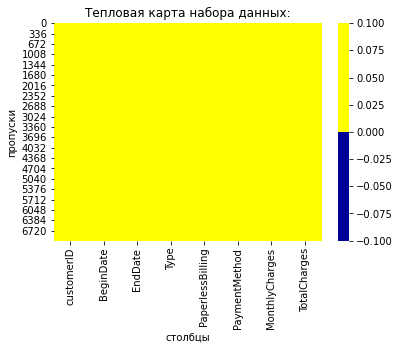

In [4]:
data_info(df_contract)

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> У всех визуализаций должны быть заголовки и подписи осей. Что мы здесь должны увидеть? (по исследованию остальных датасетов такой же вопрос)</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил заголовок, подписи осей</div>

In [5]:
display(df_contract['PaymentMethod'].unique())
display(df_contract['Type'].unique())
display(df_contract['PaperlessBilling'].unique())

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

array(['Yes', 'No'], dtype=object)

##### Вывод по df_contract:
- 7043 строк 8 столбцов
- Пропусков нет
- Столбцы **PaymentMethod**, **Type**, **PaperlessBilling** закодируем
- **BeginDate** и **EndDate** конвертнем в дату 
- Наличие даты в **EndDate**  говорит о том что пользователь прекратил пользоваться услугами, выделим в отдельный столбец как целевой признак

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Shape:


(7043, 5)


Head:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Duplicated:


,customerID,gender,SeniorCitizen,Partner,Dependents


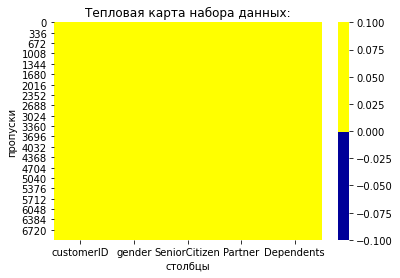

In [6]:
data_info(df_personal)

In [7]:
display(df_personal['gender'].unique())
display(df_personal['SeniorCitizen'].unique())
display(df_personal['Partner'].unique())
display(df_personal['Dependents'].unique())

array(['Female', 'Male'], dtype=object)

array([0, 1])

array(['Yes', 'No'], dtype=object)

array(['No', 'Yes'], dtype=object)

##### Вывод по df_personal:
- 7043 строк 5 столбцов
- Пропусков нет
- Столбцы **gender**, **Partner**, **Dependents** закодируем

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Shape:


(5517, 8)


Head:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2001-EWBQU,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Duplicated:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies


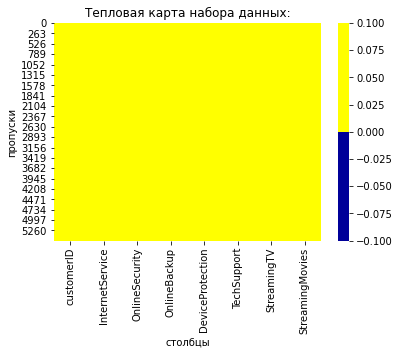

In [8]:
data_info(df_internet)

In [9]:
display(df_internet['InternetService'].unique())
display(df_internet['OnlineSecurity'].unique())
display(df_internet['OnlineBackup'].unique())
display(df_internet['DeviceProtection'].unique())
display(df_internet['TechSupport'].unique())
display(df_internet['StreamingTV'].unique())
display(df_internet['StreamingMovies'].unique())

array(['DSL', 'Fiber optic'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Yes', 'No'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

##### Вывод по df_internet:
- 5517 строк 8 столбцов
- Пропусков нет
- Столбцы **PaymentMethod**, **Type**, **PaperlessBilling** закодируем
- **BeginDate** и **EndDate** конвертнем в дату 
- Наличие даты в **EndDate**  говорит о том что пользователь прекратил пользоваться услугами, выделим в отдельный столбец как целевой признак

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Shape:


(6361, 2)


Head:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2001-EWBQU,No
freq,1,3390


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Duplicated:


,customerID,MultipleLines


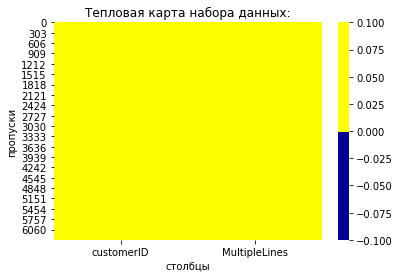

In [10]:
data_info(df_phone)

In [11]:
display(df_phone['MultipleLines'].unique())

array(['No', 'Yes'], dtype=object)

##### Вывод по df_phone:
- 6361 строк 2 столбца
- Пропусков нет
- **MultipleLines** закодируем

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Общий вывод по анализу данных:
- Данные без пропусков
- Много столбцов которые нажно подвергнуть кодированию для удобства работы
- Целевой признак нужно подготовить
- Все датафреймы нужно объединить в один
- Подготовка данных будет минимальна. 

### Подготовка данных:
- Для удобства, сначала  все датафреймы объединим
- Выделим целевой признак
- Конвертируем в дату столбцы с датами, там где стоит **No** установим дату от **BeginDate**
- Посчитаем **EndDate** - **BeginDate** для столбцов где есть **EndDate** и выведем в столбец **contract_days**, это позволит нам получить еще один полезный столбец в днях пользования услугами клиентов которые от услуг отказались. отсутствующие значения заполним датой среза т.к. клиенты на момент среза продолжают пользоваться услугами. 
<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Почему именно так?</s>
</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил почему, спасибо за подсказку на встрече) </div>
 <div class="alert alert-danger">
 <s><b>😔 Необходимо исправить V2:</b> Я же не так сказала, их можно заполнить датой среза - 20 февраля 2020 года, сейча у тебя этот столбец практически дублирует таргет</s>
 </div>
<div class="alert alert-info"> <b>🎓 Комментарий студента2:</b> Спасибо, на этот раз понял, заполняем датой среза потому что клиенты продолжают пользоваться услугами по крайней мере на момент среза</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Теперь у каждого клиента есть длительность контракта!
</div>

- Заполним пустые значения параметром **No**, пропуски появятся т.к. не все пользуются  всеми услугами
- **TotalCharges** конвертируем во float


In [12]:
df_telecom = df_contract.merge(df_personal, how='left', on='customerID') \
                        .merge(df_internet, how='left', on='customerID') \
                        .merge(df_phone, how='left', on='customerID') 

df_telecom['client_left'] = (df_telecom['EndDate'] != 'No').astype(int)

df_telecom['BeginDate'] = pd.to_datetime(df_telecom['BeginDate'], format='%Y-%m-%d')


df_telecom.loc[df_telecom['EndDate'] == 'No', ['EndDate']] \
= df_telecom.loc[df_telecom['EndDate'] == 'No', ['BeginDate']]


def f(row):
    if pd.isna(row['EndDate']):
         val = '2020-02-20'#row['BeginDate']
    else :
         val = row['EndDate']
    return val


df_telecom['EndDate'] = pd.to_datetime(df_telecom.apply (f, axis=1), format='%Y-%m-%d')

df_telecom['contract_days'] = (df_telecom['EndDate'] - df_telecom['BeginDate']).dt.days

df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'], errors ='coerce')#.fillna(0)

#Проверим что все правильно смерджилось
display(df_telecom.info(), df_telecom.shape, df_telecom.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

None

(7043, 22)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
0,7590-VHVEG,2020-01-01,2020-02-20,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,0,50
1,5575-GNVDE,2017-04-01,2020-02-20,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1055
2,3668-QPYBK,2019-10-01,2020-02-20,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,142
3,7795-CFOCW,2016-05-01,2020-02-20,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0,1390
4,9237-HQITU,2019-09-01,2020-02-20,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,172
5,9305-CDSKC,2019-03-01,2020-02-20,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0,356
6,1452-KIOVK,2018-04-01,2020-02-20,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,0,690
7,6713-OKOMC,2019-04-01,2020-02-20,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN,0,325
8,7892-POOKP,2017-07-01,2020-02-20,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0,964
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No,1,882


In [13]:
df_telecom[df_telecom['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
488,4472-LVYGI,2020-02-01,2020-02-20,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0,19
753,3115-CZMZD,2020-02-01,2020-02-20,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,19
936,5709-LVOEQ,2020-02-01,2020-02-20,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,19
1082,4367-NUYAO,2020-02-01,2020-02-20,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,19
1340,1371-DWPAZ,2020-02-01,2020-02-20,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0,19
3331,7644-OMVMY,2020-02-01,2020-02-20,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,19
3826,3213-VVOLG,2020-02-01,2020-02-20,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,19
4380,2520-SGTTA,2020-02-01,2020-02-20,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,19
5218,2923-ARZLG,2020-02-01,2020-02-20,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,19
6670,4075-WKNIU,2020-02-01,2020-02-20,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0,19


- Есть пропуски в TotalCharges, это новые клиенты, пропуски заполним значением 0

<div class="alert alert-success">
 <b>👍 Успех:</b> Все верно! Они еще не успели что-то заплатить
 </div>

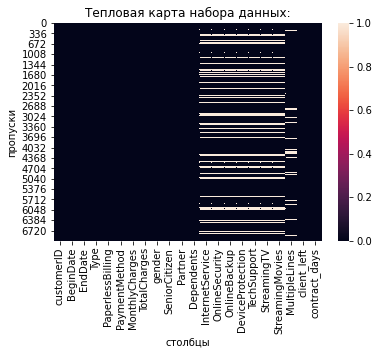

In [14]:
df_telecom['TotalCharges'] = df_telecom['TotalCharges'].fillna(0)
df_telecom[df_telecom['TotalCharges'].isnull()]


cols = df_telecom.columns
ax = sns.heatmap(df_telecom[cols].isnull())
ax.set(title="Тепловая карта набора данных:",xlabel='столбцы', ylabel="пропуски")
ax.xaxis.tick_bottom()

#### По тепловой карте видно что пропуски остались только в сервисах которые не используются клиентом, заменим значение на  **No**

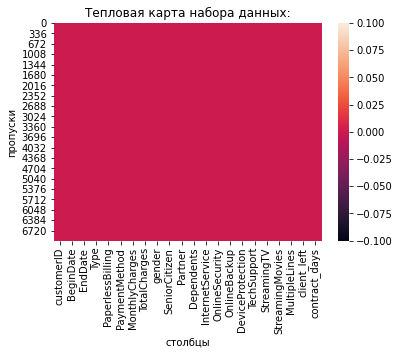

In [15]:
df_telecom = df_telecom.fillna('No')

cols = df_telecom.columns
ax = sns.heatmap(df_telecom[cols].isnull())
ax.set(title="Тепловая карта набора данных:",xlabel='столбцы', ylabel="пропуски")
ax.xaxis.tick_bottom()

#### Карта потеплела и на душе потеплело :) 

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Нельзя заполнять пропуски не глядя на них! Сколько пропусков в TotalCharges? Откуда они появились? Почему заполняем именно так?</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> в TotalCharges пропуски у новичков, заполнили значением 0, описание добавил,  красивых тепловых карт тоже</div>

<div class="alert alert-success">
 <b>👍 Успех:</b> Теперь все понятно! Не забывай все проверять и объяснять свои решения
 </div>

### Анализ данных:
- Все кодируемые столбцы закодируем
- Глянем  корреляцию
- Глянем выбросы и распределение значений

Shape:


(7043, 22)


Head:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
0,7590-VHVEG,2020-01-01,2020-02-20,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,50
1,5575-GNVDE,2017-04-01,2020-02-20,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1055
2,3668-QPYBK,2019-10-01,2020-02-20,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,142
3,7795-CFOCW,2016-05-01,2020-02-20,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1390
4,9237-HQITU,2019-09-01,2020-02-20,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,172



Describe:



,MonthlyCharges,TotalCharges,SeniorCitizen,client_left,contract_days
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,0.162147,0.156325,914.585546
std,30.090047,2112.742814,0.368612,0.363189,683.050957
min,18.250000,0.000000,0.000000,0.000000,19.000000
25%,35.500000,436.750000,0.000000,0.000000,295.000000
50%,70.350000,1343.350000,0.000000,0.000000,780.000000
75%,89.850000,3236.690000,0.000000,0.000000,1461.000000
max,118.750000,9221.380000,1.000000,1.000000,2333.000000


Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup     

None

Duplicated:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days


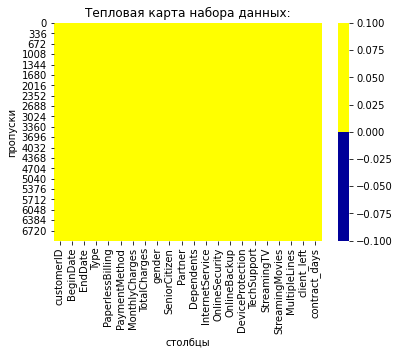

In [16]:
data_info(df_telecom)

#### Глянем корреляцию числовых признаков

In [17]:
cols = ['contract_days', 'MonthlyCharges', 'TotalCharges']
df_telecom[cols].corr()


,contract_days,MonthlyCharges,TotalCharges
contract_days,1.000000,0.218521,0.821315
MonthlyCharges,0.218521,1.000000,0.630440
TotalCharges,0.821315,0.630440,1.000000


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> SeniorCitizen категориальный признак, корреляция Пирсона не подходит для таких данных. Что делать с корреляцией contract_days от client_left ? </s>
</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> оставил корреляцию только числовых признаков, выводы по корреляции ниже после графиков</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента3:</b> поправил корреляцию</div>

- Обнаружена высокая корреляция **contract_days** от **TotalCharges**, это объясняется тем что чем больше  дней клиент пльзуется услугами тем больше в сумме оплата. В дальнейшем столбец **TotalCharges** удалим

In [18]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

'Type'

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

'PaperlessBilling'

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

'PaymentMethod'

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

'gender'

Male      3555
Female    3488
Name: gender, dtype: int64

'SeniorCitizen'

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

'Partner'

No     3641
Yes    3402
Name: Partner, dtype: int64

'Dependents'

No     4933
Yes    2110
Name: Dependents, dtype: int64

'InternetService'

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

'OnlineSecurity'

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

'OnlineBackup'

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

'DeviceProtection'

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

'TechSupport'

No     4999
Yes    2044
Name: TechSupport, dtype: int64

'StreamingTV'

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

'StreamingMovies'

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

'MultipleLines'

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

'client_left'

0    5942
1    1101
Name: client_left, dtype: int64

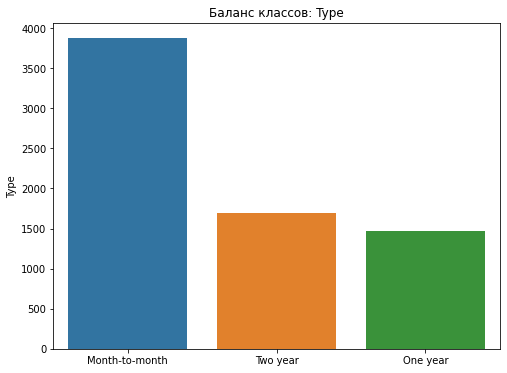

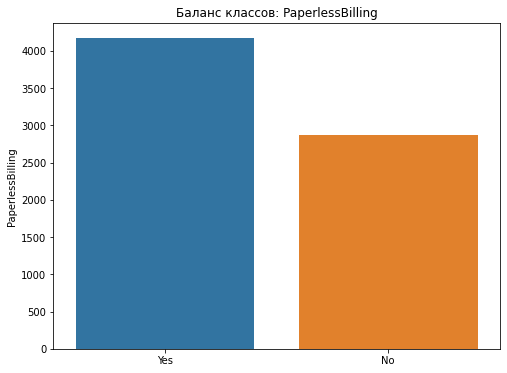

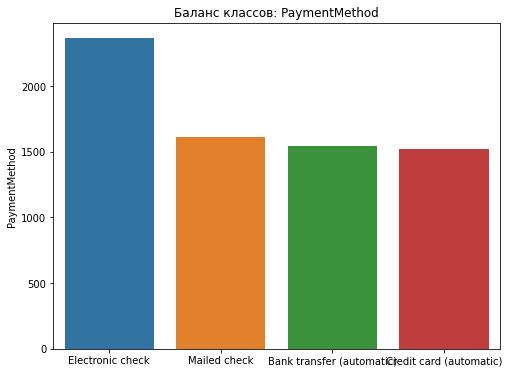

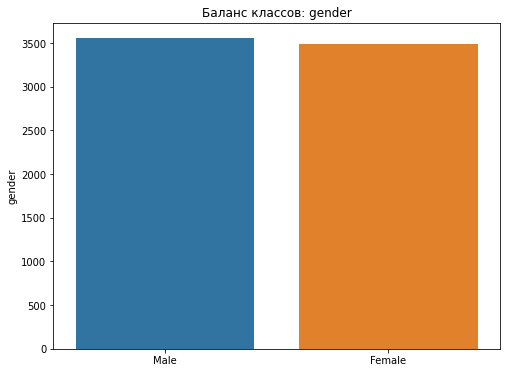

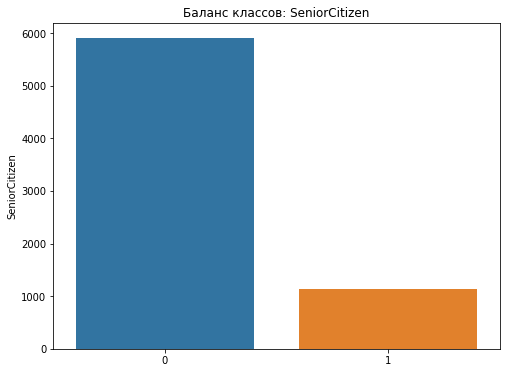

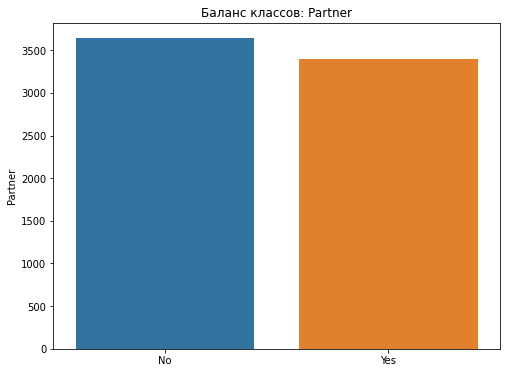

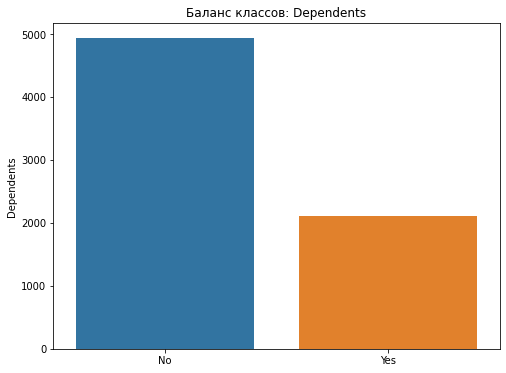

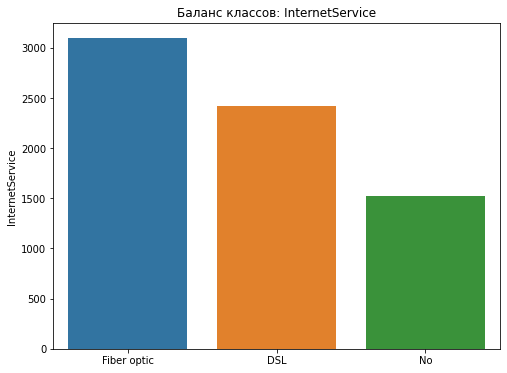

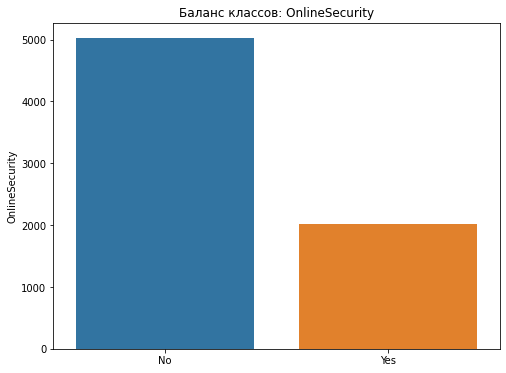

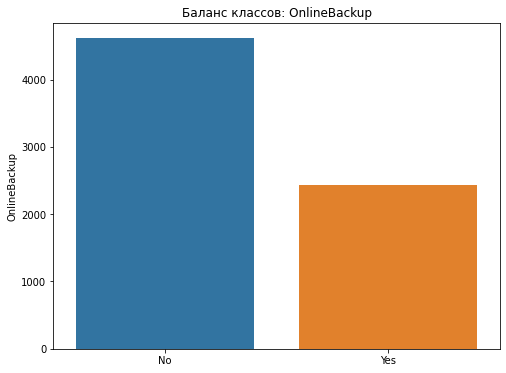

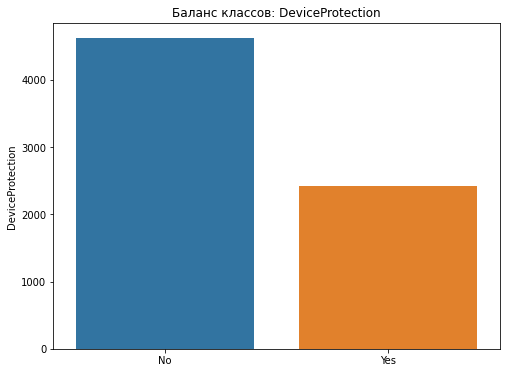

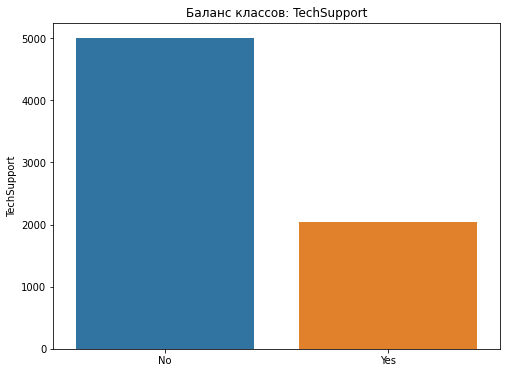

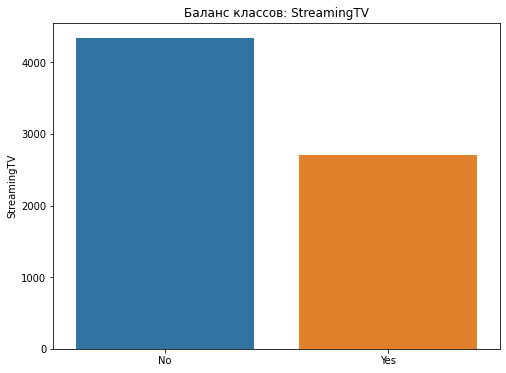

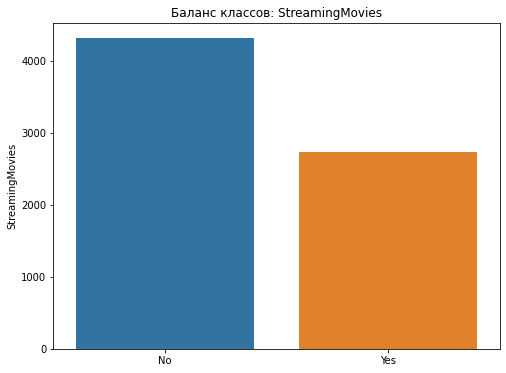

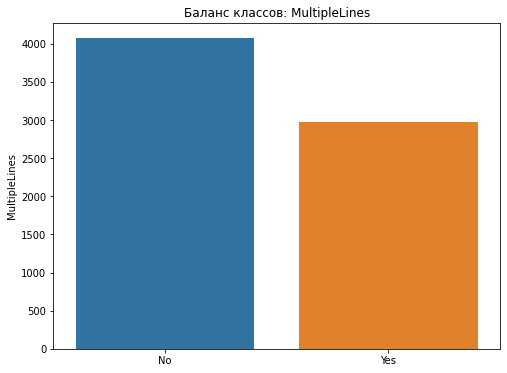

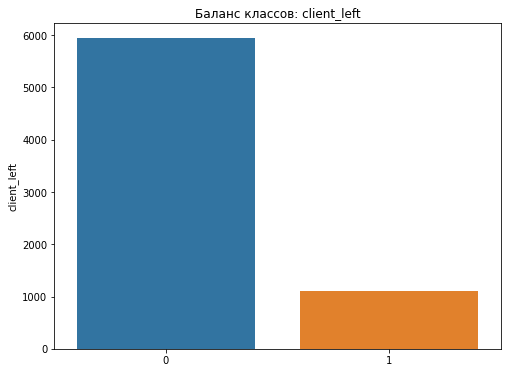

In [19]:
columns = ['Type', 'PaperlessBilling',
       'PaymentMethod', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'client_left']

for a in columns:

    plt.figure(figsize=(8,6))
    sns.barplot(x=df_telecom[a].value_counts().index,y=df_telecom[a].value_counts())
    plt.title("Баланс классов: " + str(a))
    display(a, df_telecom[a].value_counts())

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Графики невозможно рассмотреть из-за размера окна и размера графиков</s>
</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> сначала не понял а потом кааак понял, окно вывода можно менять, круто!!! Эта штука мне точно пригодится, спасибо огромное! </div>

<div class="alert alert-success">
 <b>👍 Успех:</b> И размеры графиков можно менять)))
 </div>

#### Вывод по балансу классов
- **Type**: по большей части пользователи платят помесячно 
- **PaperlessBilling**: предпочтение отдается биллингу в электронном виде
- **PaymentMethod**: оплата через эл чек
- **gender**: пол примерно поровну
- **SeniorCitizen**: в основном не пенсионеры
- **Partner**: примерно поровну
- **Dependents**: большая часть это работающие люди
- **InternetService**: предпочтение отдается оптическому каналу
- **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**,**MultipleLines**: в основном клиенты предпочитают не пользоваться опциями
- **client_left**: примерно один к пяти в пользу не ушедших клиентов

In [20]:
df_telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
0,7590-VHVEG,2020-01-01,2020-02-20,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,50
1,5575-GNVDE,2017-04-01,2020-02-20,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1055
2,3668-QPYBK,2019-10-01,2020-02-20,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,142
3,7795-CFOCW,2016-05-01,2020-02-20,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1390
4,9237-HQITU,2019-09-01,2020-02-20,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,172


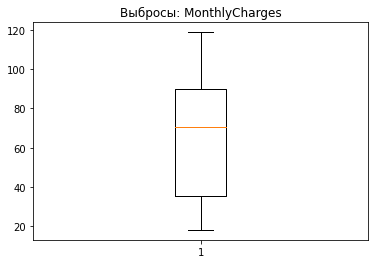

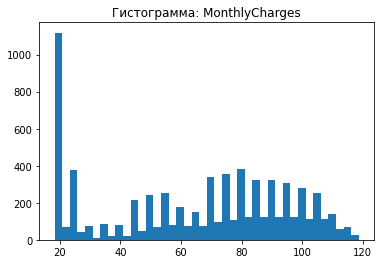

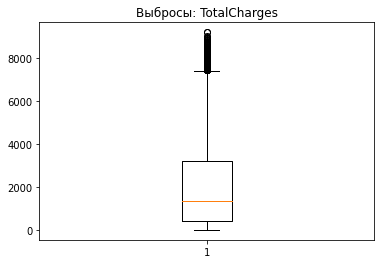

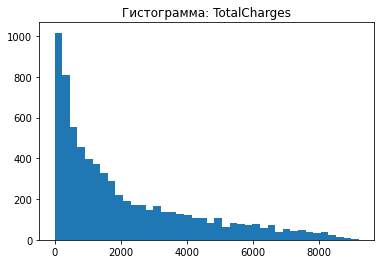

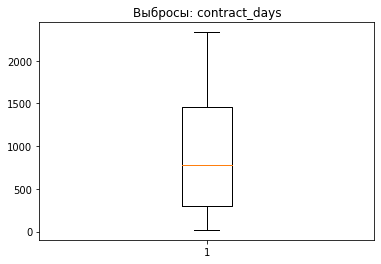

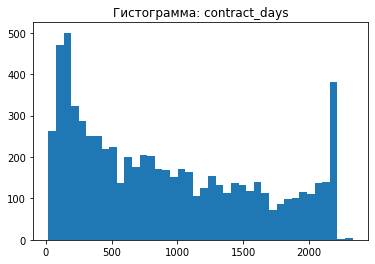

In [21]:
columns = ['MonthlyCharges', 'TotalCharges','contract_days']

for a in columns:

    plt.boxplot(x=df_telecom[a]);
    plt.title("Выбросы: " + str(a))
    plt.show()
    
    plt.hist(df_telecom[a], bins=40)
    plt.title("Гистограмма: " + str(a))
    plt.show()

#### contract_days выведем еще раз с параметрами больше 0

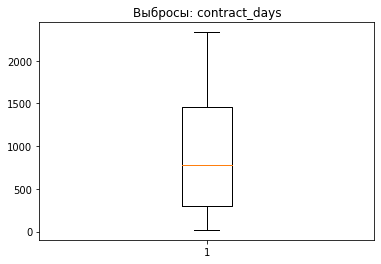

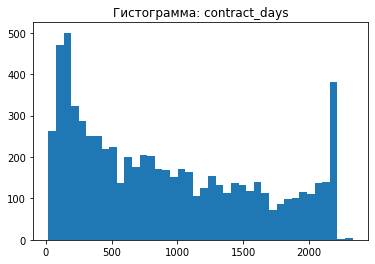

In [22]:
plt.boxplot(x=df_telecom.loc[df_telecom['contract_days'] > 0, ['contract_days']]);
plt.title("Выбросы: " + 'contract_days')
plt.show()

plt.hist(df_telecom.loc[df_telecom['contract_days'] > 0, ['contract_days']], bins=40)
plt.title("Гистограмма: " + 'contract_days')
plt.show()

#### Вывод по балансу числовых данных
- **MonthlyCharges:** медиана в районе 70, нижний квартиль от 35, верхний до 90
- **TotalCharges:** медиана в районе 1000, нижний квартиль от 700, верхний до 3200
- **contract_days:** медиана в районе 990, нижний квартиль от 550, верхний до 1300

- На гистограмме **TotalCharges** наблюдается убывающий тренд, в то же время у **MonthlyCharges** пик в районе 80 - это значит, те кто переплачивают за тарифы, рано или поздно отказываются от услуг, чем больше киент пользуется услугами тем более желательно не повышать их стоимость.

#### Проведите исследовательский анализ данных. В конце Jupyter Notebook напишите:
- Список уточняющих вопросов.
- Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.
- Цель проекта.

##### Список уточняющих вопросов
- Можно random_state без ведущего ноля использовать? 
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> да, конечно
</div>


- Можно использовать любые модели? Интересно попрактиковаться с моделями keras и возможно, использовать свою полносвязную модель. 

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> лучше ограничится изученными в курсе моделями
</div>

##### Примерный план решения задачи
- Провести анализ данных
- Объединить данные в один датафрейм
- Вывести графики и определить выбросы и закономерности
- Закодировать категориальные признаки
- Разбить выборки на  тестову и валидационную
- Выбрать модели и гиперпараметры методом **grid search** для лучшего результата
- Добиться значения 0.85 метрики **auc_roc** на тестовой выборке от модели
- Добавить итоговый вывод

##### Цель проекта
- Спрогнозировать вероятность ухода клиента для уменьшения общего оттока

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> План должен быть немного подробней, не вижу про кодирование, разбиение на выборки и т.п.</s>
</div>
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> В план добавил информации </div>

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить V2:</b> Длительность контракта все же давай исправим</s>
 </div>

<div class="alert alert-success">
<b>👍 Успех:</b> План принят!
</div>

### Подготовка данных и обучение моделей
- Уберем столбцы ненужные для обучения
- Разобьем выборку на тестовую и валидационную
- Закодируем категориальные признаки
- Подберем лучшие параметры для обучения моделей
- Лучшую проверим на валидационной выборке
- Напишем итоговый вывод

In [23]:
#Посмотрим еще раз на данные
df_telecom.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
0,7590-VHVEG,2020-01-01,2020-02-20,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,50
1,5575-GNVDE,2017-04-01,2020-02-20,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1055
2,3668-QPYBK,2019-10-01,2020-02-20,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,142
3,7795-CFOCW,2016-05-01,2020-02-20,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1390
4,9237-HQITU,2019-09-01,2020-02-20,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,172


#### Уберем столбцы ненужные для обучения

In [24]:
df_telecom = df_telecom.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges'], axis = 1)
df_telecom.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,client_left,contract_days
0,Month-to-month,Yes,Electronic check,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,0,50
1,One year,No,Mailed check,56.95,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1055
2,Month-to-month,Yes,Mailed check,53.85,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,142
3,One year,No,Bank transfer (automatic),42.30,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,0,1390
4,Month-to-month,Yes,Electronic check,70.70,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,172


 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

####  Разобьем выборку на тестовую и валидационную

In [25]:
features = df_telecom.drop(['client_left'], axis = 1)
target = df_telecom.client_left

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=random_state)

display(features_train.shape, features_valid.shape, features_train.head())

(5282, 17)

(1761, 17)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,contract_days
1675,Month-to-month,Yes,Electronic check,78.90,Female,0,No,No,Fiber optic,No,No,No,No,Yes,No,No,964
4310,Two year,Yes,Bank transfer (automatic),65.60,Male,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,No,365
1447,Month-to-month,No,Credit card (automatic),80.80,Male,0,No,Yes,Fiber optic,No,No,No,Yes,No,No,Yes,172
2133,Month-to-month,Yes,Electronic check,70.55,Female,1,No,No,Fiber optic,No,No,No,No,No,No,No,172
854,Two year,No,Credit card (automatic),20.50,Female,0,No,No,No,No,No,No,No,No,No,No,2090


 <div class="alert alert-danger">
 <s><b>😔 Необходимо исправить:</b> После любых преобразований нужно смотреть датасеты, точно все получилось так, как мы ожидали? После кодирования тоже стоит посмотреть что получилось</s>
 </div>
 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Вывел информацию</div>

#### Закодируем категориальные признаки


In [26]:
#Кодируем
categories = ['Type','PaperlessBilling','PaymentMethod','gender', 'Partner', 
              'Dependents','InternetService'
              ,'OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','MultipleLines']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(features_train[categories])

features_train[categories] = encoder.transform(features_train[categories])
features_valid[categories] = encoder.transform(features_valid[categories])

display(features_train.shape, features_valid.shape, features_train)

(5282, 17)

(1761, 17)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,contract_days
1675,0.0,1.0,2.0,78.90,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,964
4310,2.0,1.0,0.0,65.60,1.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,365
1447,0.0,0.0,1.0,80.80,1.0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,172
2133,0.0,1.0,2.0,70.55,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172
854,2.0,0.0,1.0,20.50,0.0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2.0,1.0,0.0,71.90,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1157
2255,0.0,0.0,3.0,51.20,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50
2076,1.0,0.0,1.0,59.10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,446
6533,0.0,1.0,2.0,105.80,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,872


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Какие признаки ты здесь кодируешь? Проверь еще раз в каких столбцах у тебя категориальные, а в каких численные</s>
</div>
 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Понял ошибку, спасибо! Я кодировал все, а теперь кодирую только категориальные признаки</div>
  <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

#### Подберем лучшие параметры для обучения моделей
 - У нас есть алгоритмы: **CatBoostClassifier**, **RandomForestClassifier**, **DecisionTreeClassifier**
 - В данном случае у нас задача классификации т.к. нужно предсказать качественное а не  количественное  значение (либо 0 либо 1)

In [27]:
%%time

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [2, 10],
    'n_estimators': [10, 50, 100], 
}


model = RandomForestClassifier(random_state=random_state)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

display(f'ROC-AUC score {search.best_score_}, best prams: {search.best_params_}')

"ROC-AUC score 0.8280708871687871, best prams: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}"

CPU times: user 33.1 s, sys: 166 ms, total: 33.3 s
Wall time: 33.3 s


In [28]:
%%time
param_grid = {'min_samples_leaf': [1, 10, 30, 50, 100, 150], 
              'max_depth':range(3,100,5)
              }

model = DecisionTreeClassifier(random_state=random_state)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

display(f'ROC-AUC score {search.best_score_}, best prams: {search.best_params_}')

"ROC-AUC score 0.798198455071104, best prams: {'max_depth': 13, 'min_samples_leaf': 50}"

CPU times: user 8.77 s, sys: 22.8 ms, total: 8.79 s
Wall time: 8.82 s


In [29]:
%%time
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5, 0.8],
    'iterations': [10, 50, 100],
    'l2_leaf_reg': [3, 9, 12]
}

model = CatBoostClassifier(random_state=random_state, verbose=0)

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit="AUC",)
search.fit(features_train, target_train)


display(f'ROC-AUC score (best_score_) {search.best_score_}',
        f'ROC-AUC score {np.ndarray.max(search.cv_results_["mean_test_AUC"])}', 
        f'Accuracy {np.ndarray.max(search.cv_results_["mean_test_Accuracy"])}', 
        f'best prams: {search.best_params_}')

'ROC-AUC score (best_score_) 0.9606291046269959'

'ROC-AUC score 0.9606291046269959'

'Accuracy 0.9348739284997564'

"best prams: {'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.8}"

CPU times: user 17 s, sys: 795 ms, total: 17.8 s
Wall time: 1min 30s


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь тоже нужно использовать метрику best_score_ из GridSearchCV</s>
</div>
 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> я вывел в таком виде  чтобы  отобразить втору метрику (Accuracy), ок, вывел дополнительно best_score чтобы было понятно что мое решение совпадает до последней цифры. </div>
  <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

#### Лучшую проверим на валидационной выборке


 <div class="alert alert-warning">
    <s><b>🤔 Рекомендация:</b> у нас нет валидационной выборки, есть тренировочная и тестовая</s>
 </div>
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> поправил</div>

- Лучшая точность у модели **CatBoostClassifier**
- Проверим на валидационной выборке с лучшими параметрами
- Отобразим график

In [30]:
def rounded(a):
    if a > 0.5:
        a = 1
    else:
        a = 0
    return a    


def plot_roc_curve(target_valid, predictions):
    print('ROC-AUC score', roc_auc_score(target_valid, predictions))
    
    acc = map(rounded, predictions)
    print('Accuracy score', accuracy_score(target_valid, list(acc)))
    
    fpr, tpr, thresholds = roc_curve(target_valid, predictions)

    plt.figure(figsize=(11, 5))
    
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC-кривая')
    plt.show()

ROC-AUC score 0.9741759451853664
Accuracy score 0.9585462805224304


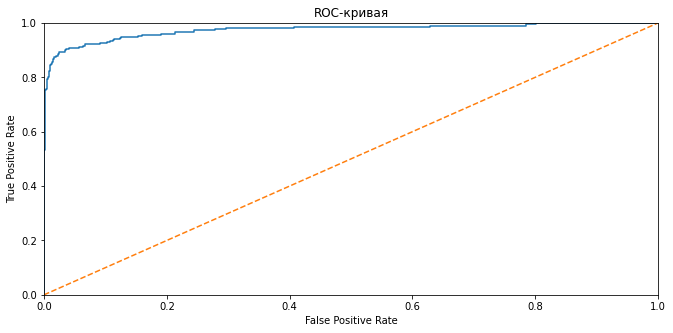

In [31]:
predict_proba = search.best_estimator_.predict_proba(features_valid)[:, 1]
plot_roc_curve(target_valid, predict_proba)

,importances
contract_days,58.548843
Type,9.011977
MonthlyCharges,7.379809
PaymentMethod,4.353019
OnlineBackup,4.231811
Partner,3.819308
DeviceProtection,2.698580
MultipleLines,2.127009
StreamingMovies,1.605600
Dependents,1.279023


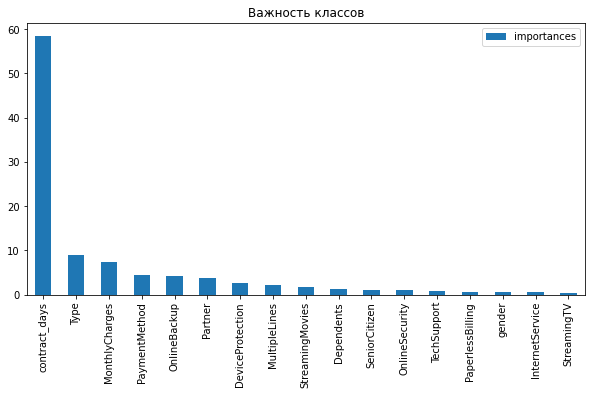

In [32]:
imp = pd.DataFrame(search.best_estimator_.feature_importances_, index = features_train.columns, columns=['importances'])
imp = imp.sort_values(by='importances', ascending=False)
display(imp)

imp.plot(kind='bar', figsize=(10, 5), title='Важность классов')
plt.show()

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Все ячейки должны запускаться в тренажере</s>
</div>
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> поправил</div>

Confusion matrix, without normalization
[[1481    5]
 [  68  207]]


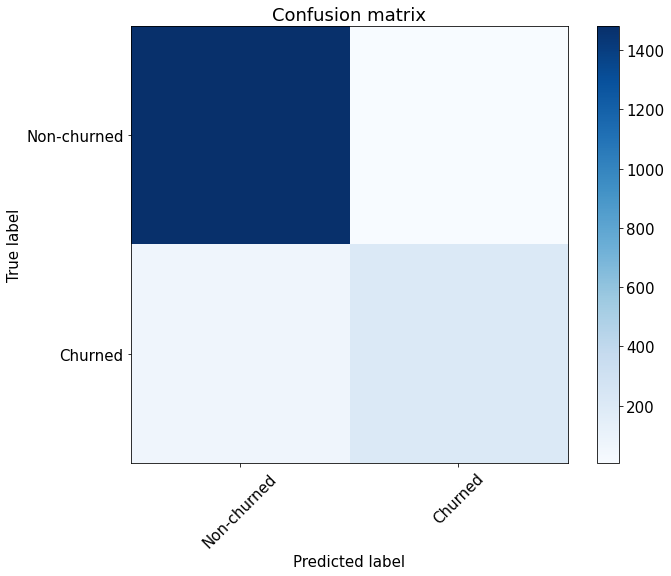

In [33]:
acc = list(map(rounded, predict_proba))

r = sklearn.metrics.confusion_matrix(target_valid, acc)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = r
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

 <div class="alert alert-danger">
<s> <b>😔 Необходимо исправить:</b> Для AUC-ROC на тестовой выборке нужно использовать predict_proba, так же нужно посмотреть важность признаков и матрицу ошибок</s>
 </div>
 <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> поправил, добавил важность признаков и матрицу ошибок, добавил инфу в вывод</div>

### Итоговый вывод

- В данном проекте был проведен исследовательский анализ и обучены модели для определения вероятности отказа клиента от услуг
- Первым делом мы изуили данные и объединили их в один датафрейм
- После чего данные обработали и заменили пропуски
- Также добавили два новых столбца: целевой признак **client_left**, где значение 1 значит что клиент от услуг отказался и **contract_days**, который показывает сколько по времени пользователь пользовался услугами
- После чего провели исследовательский анализ данных: проанализировали количественные и категоральные признаки, глянули корреляцию
- Были сделаны следующие выводы: чем больше киент пользуется услугами тем более желательно не повышать их стоимость
- Дальше мы подготовили данные для обучения: удалили ненужные столбцы а нужные категориальные закодировали, датафрейм разделили на обучающую и валидационную выборки
- И приступили непосредственно к обучению, взяли модели **DecisionTreeClassifier**, **RandomForestClassifier** и **CatBoostClassifier**. Уже до обучения моделей было понятно на основе прелдыдущего опыта что последняя модель покажет лучший результат, но в рамках обучения модели нужно было погонять и сравнить
- Лучший результат как и ожидалось у **CatBoostClassifier** со значением  **ROC-AUC** в 0.96 и с точностью 0.95
- Вывели график важности признаков и матрицу ошибок

<div class="alert alert-success">
<b>👍 Успех:</b> Основная часть завершена! Были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важнапя часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов.<p>
    Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://ml-handbook.ru/

- Лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/
</div>

### Отчет по проекту


#### В отчёте ответим на вопросы:

#### Какие пункты плана были выполнены, а какие — нет. Почему?
   - Были выполнены все пункты проекта:
        - Провести анализ данных
        - Объединить данные в один датафрейм
        - Вывести графики и определить выбросы и закономерности
        - Закодировать категориальные признаки
        - Разбить выборки на  тестову и валидационную
        - Выбрать модели и гиперпараметры методом **grid search** для лучшего результата
        - Добиться значения 0.85 метрики **auc_roc** на тестовой выборке от модели
        - Добавить итоговый вывод
#### Какие трудности возникли и как вы их преодолели?
   - Потебовалось провести работы для выделения в отдельный столбец целевого признака т.к. изначально в данных он находился как дата завершения контракта
#### Какие ключевые шаги в решении задачи вы выделили?
   - Анализ данных: прежде всего мы проверили что все данные можно правильно интерпретировать, отобразили по данным тепловую карту, проверили строки на дубликаты, и в целом ознакомились со структурой
   - Преобразование данных: На этом шаге мы выделили в отдельный столбец категориальный целевой признак, обработали пропуски, посчитали дни с начала пользования услугами до завершения, либо до даты среза если клиент еще с нами, вывели в **contract_days**, объединили данные в один датафрейм а после обработали пропуски там где они были ввиду того что клиенты не пользубтся всеми услугами сразу
   - Вывели графики и определили наличие выбросов и закономерностей
   - Подготовка данных для обучения: Были удалены столбцы с датами, **customerID**, и **TotalCharges** который  сильно коррелировал с **contract_days** а также закодированы категориальные признаки с помощью **OrdinalEncoder**
    - Обучить модель с метрикой auc_roc > 0.85: по рекомендации тимлида было решено использовать готовые модели, было принято решение использовать **DecisionTreeClassifier**, **RandomForestClassifier** и **CatBoostClassifier** и выполнить на них кроссвалидацию с помощью **GridSearchCV**
    - После обучения модели, вывели графии важности классов, auc-roc кривой, и матрицу ошибок
#### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?
   - Были использованы все имеющиеся признаки кроме: **customerID** т.к. это уид клиента, **BeginDate**, **EndDate** т.к. это даты и они уже нам не нужны, **TotalCharges** ввиду высокой корреляции с с **contract_days** 
#### Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?
   - Итоговой моделью ожидаемо оказался классификатор **CatBoostClassifier**, где с помощью кроссвалидации выяснили что лучшими будут следующие параметры: **iterations**: 100, **l2_leaf_reg**: 3, **learning_rate**: 0.8 и качество моделей: **ROC-AUC** 0.97 **Accuracy** 0.95, параметр **random_state**: 30423

#### Итоговые графики:
- Важность признаков:
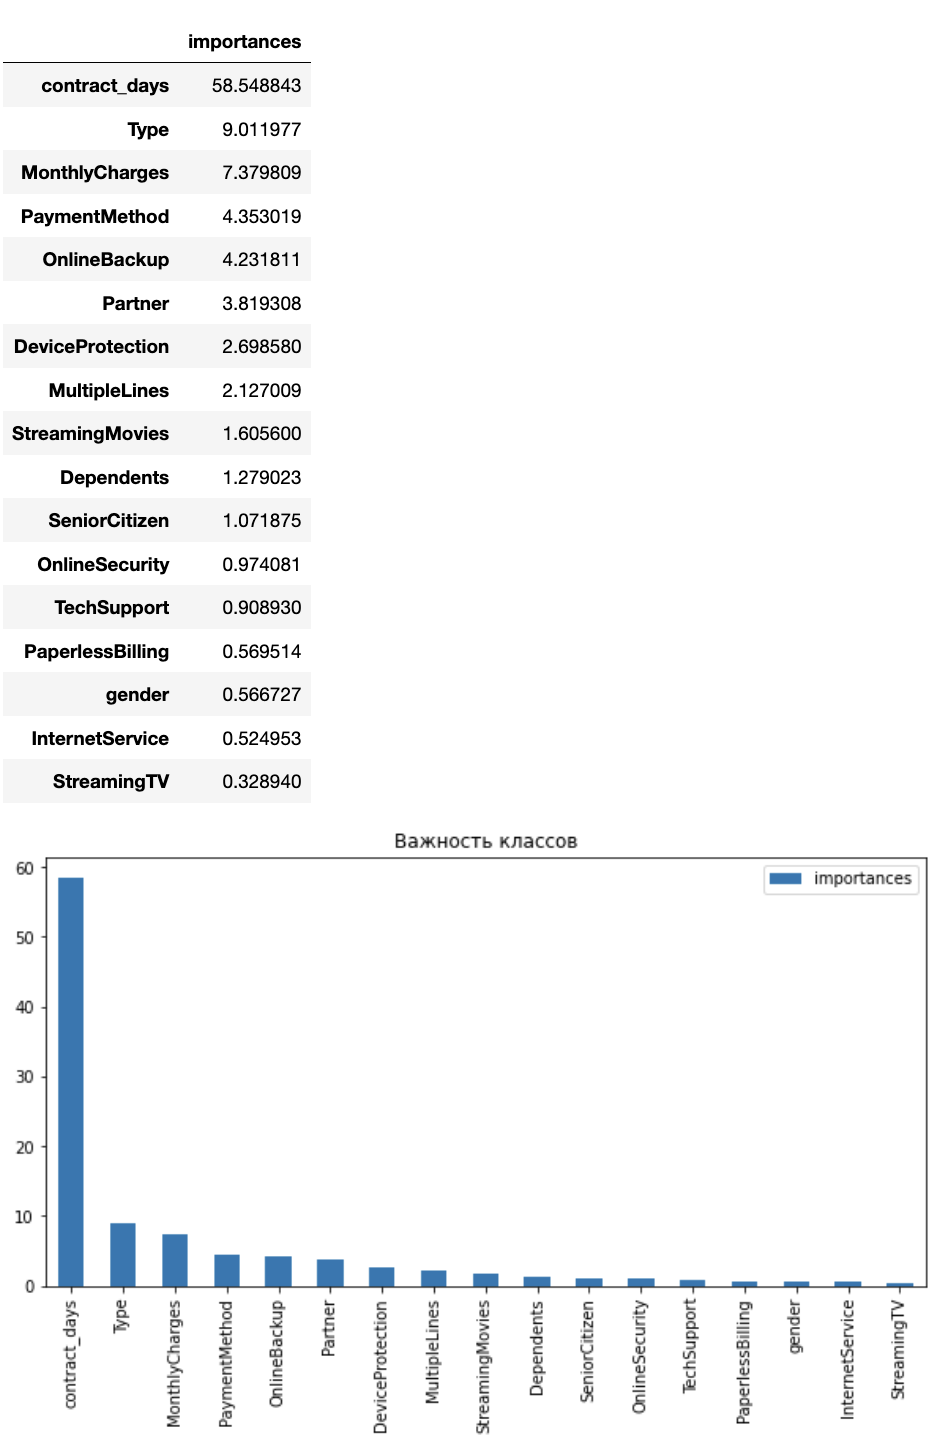
- Матрица ошибок:
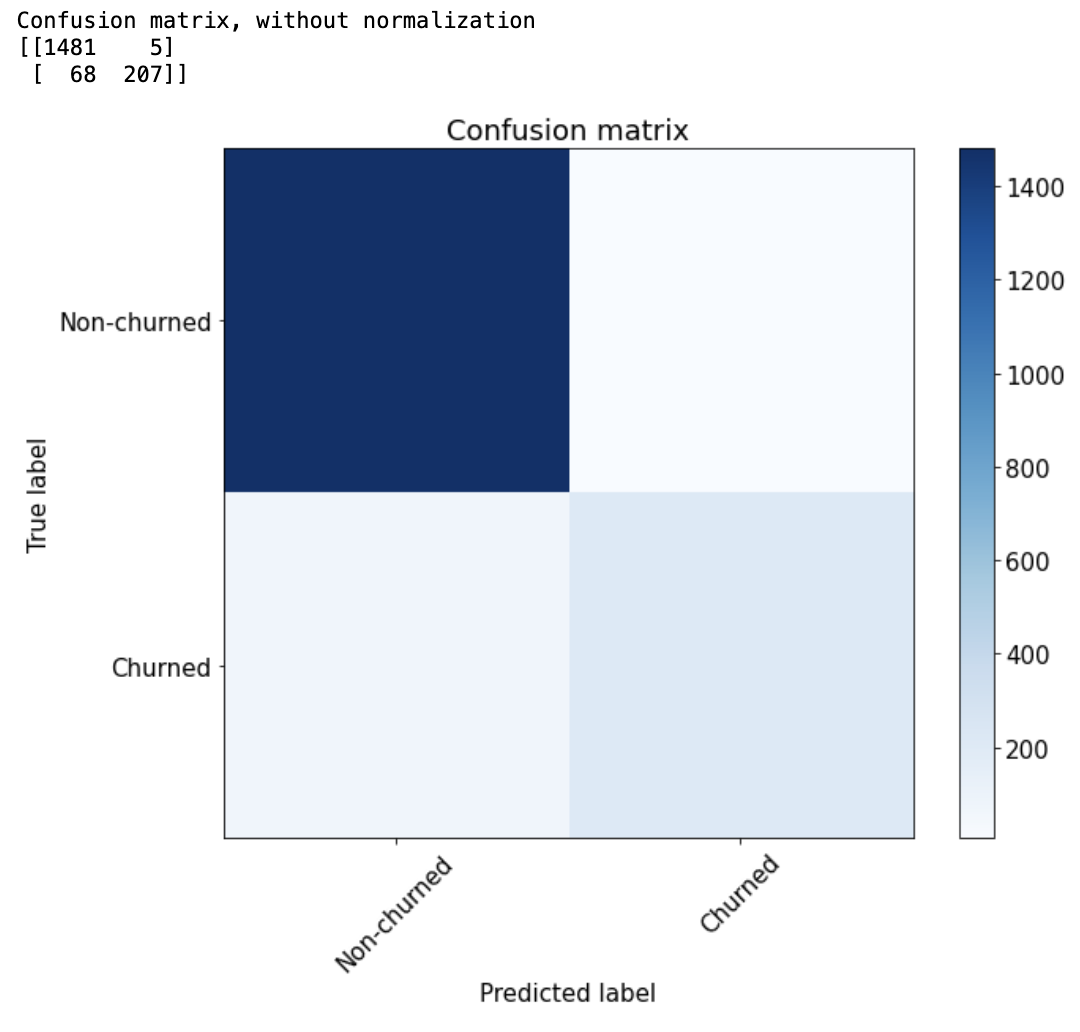
- ROC кривая:
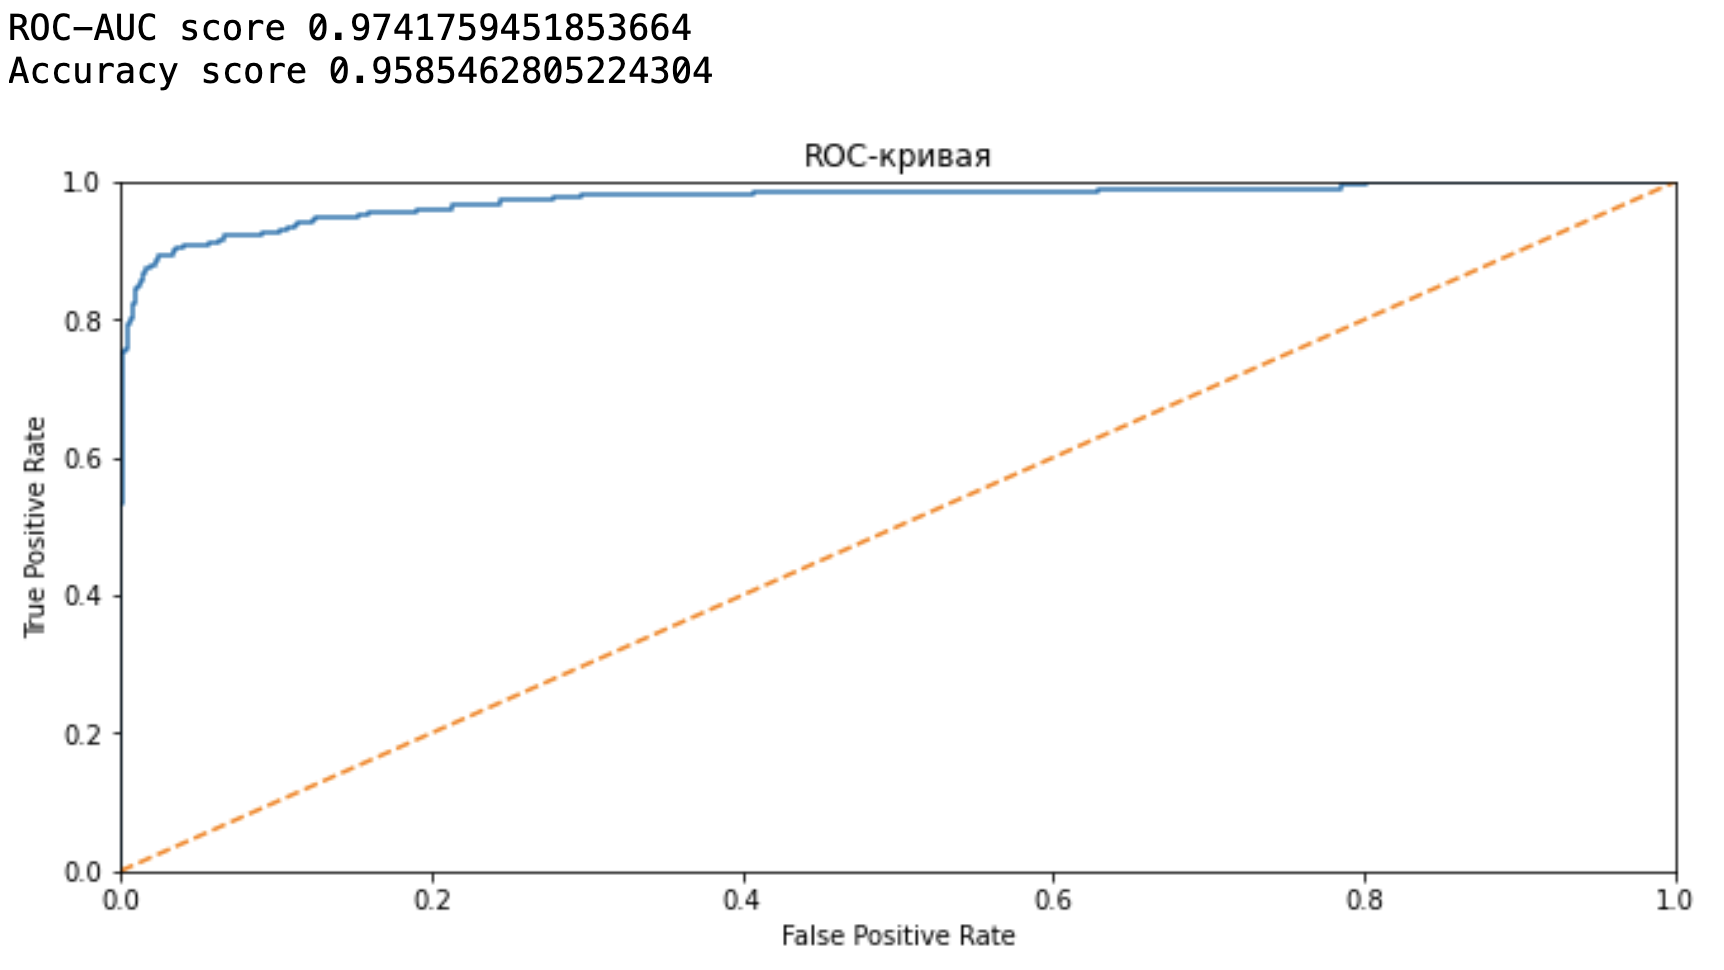

 <div class="alert alert-danger">
 <s><b>😔 Необходимо исправить:</b> По модели нужно добавить RANDOM_STATE и в виде картинок визуализацию важности признаков, матрицу ошибок и ROC кривую</s>
 </div>
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> поправил, добавил картинки, очень надеюсь что все отобразится и проект буде завершен ) </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Хороший подробный отчет, молодец! Поздравляю тебя с окончанием курса! <p>
    Было исследовано несколько моделей и выбрана лучшая, в отчете все подробно описано и проилюстрировано. Визуализация так же является очень важной частью работы, это позволяет легче видеть большее количество информации и упрощает принятие решений, делает различные сравнения более наглядными. С этой частью ты тоже хорошо справился.<p>
    С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрал очень динамично развивающуюся область. <p>
    В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
    Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>
    Удачи тебе и профессионального роста!

</div>